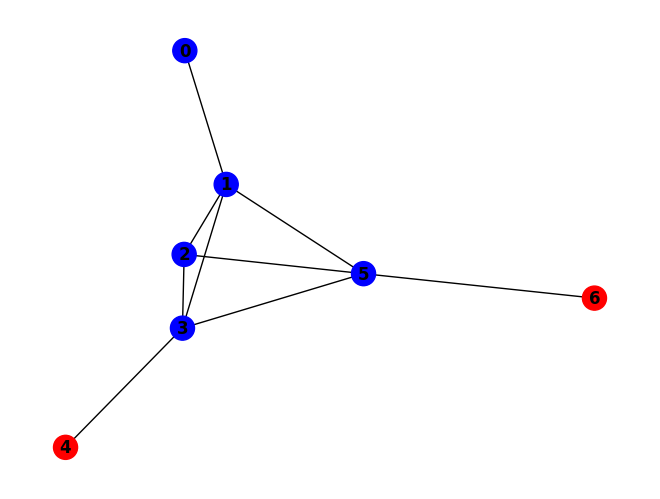

In [1]:
from components import *
import networkx as nx

rede = Network()
rede.set_topology("Vienna")
#rede.set_lattice_topology(20, 30)
controlador = Controller(rede)

rede.newDraw()

In [2]:
#paths = list(nx.shortest_simple_paths(rede.G, 0, 3))
#print(paths)

In [15]:
from itertools import islice
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )
k_shortest_paths(rede.G, 0, 1, 5)

[[0, 1]]

In [4]:
def dfs_paths(G, source, target, length, path=None):
    if path is None:
        path = [source]

    if len(path) == length:
        if path[-1] == target:
            yield path
        return

    for neighbor in G.neighbors(source):
        if neighbor not in path:
            yield from dfs_paths(G, neighbor, target, length, path + [neighbor])

def find_paths_of_length(G, source, target, length):
    return list(dfs_paths(G, source, target, length + 1))  # length + 1 because length includes the source node

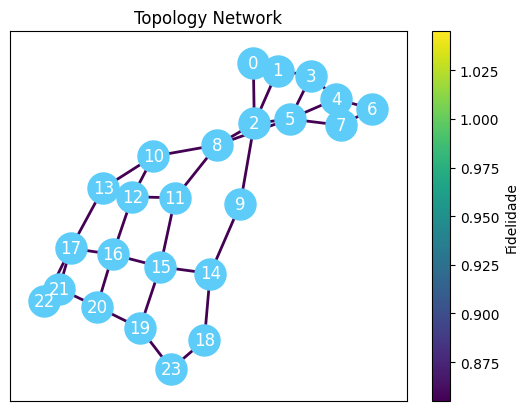

([<components.qubit.Qubit object at 0x00000189FFD53200>], {0})


In [5]:
usa = Network()
usa.set_USA_topology()
controlador.set_network(usa)
usa.draw()

q = Qubit()
qlist = [q]
print(usa.send_qubits([1, 3], qlist))


In [ ]:
# Topologia China

# Exemplo de uso
n_simulacoes = 100
n_requests = 100
apps = ["BB84", "E91", "B92"]
routes_calculation_type = 'kshortest'
caso = 1

# Calculando e coletando resultados
vazao, taxa = run_simulations(rede, controlador, n_simulacoes, n_requests, apps, caso, routes_calculation_type)
media_sucesso = np.mean(taxa)
desvio_padrao_sucesso = np.std(taxa)
media_vazao = np.mean(vazao)
desvio_padrao_vazao = np.std(vazao)

print(formatar_numero(media_vazao),
formatar_numero(desvio_padrao_vazao),
formatar_numero(media_sucesso),
formatar_numero(desvio_padrao_sucesso))